In [1]:
import pandas as pd
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re
import ast
warnings.filterwarnings("ignore")

In [2]:
path_X = 'book_full_common.csv'
path_y = 'rate_common.csv'

In [3]:
with open(path_X) as f:
    print(f)

<_io.TextIOWrapper name='book_full_common.csv' mode='r' encoding='cp1252'>


In [4]:
df_X = pd.read_csv(path_X)
df_y = pd.read_csv(path_y)

In [5]:
df_X.drop('Unnamed: 0', axis=1, inplace=True)
df_y.drop('Unnamed: 0', axis=1, inplace=True)
df_X.head(1)

,id,link,series,author,author_link,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,settings,characters,description,title,awards,followers
0,136251,https://www.goodreads.com/book/show/136251.Har...,Harry Potter #7,J.K. Rowling,https://www.goodreads.com/author/show/1077326....,3820131.0,89049.0,759,"July 21, 2007",Arthur A. Levine Books,Harry Potter and the Deathly Hallows,"Fantasy 61217, Young Adult 17476, Fiction 1699...",NaN,NaN,"London, England, Hogwarts School of Witchcraft...","Sirius Black, Ron Weasley, Petunia Dursley, Ve...","Harry has been burdened with a dark, dangerous...",Harry Potter and the Deathly Hallows,"['Locus Award', 'Odyssey Award', 'Audie Award'...",228163.0


### Dropping irrelative feature 

Do không liên quan đến sách ta drop: link

In [6]:
df_X.drop(['link', 'author_link'], axis=1, inplace=True)

In [7]:
df_X

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,settings,characters,description,title,awards,followers
0,136251,Harry Potter #7,J.K. Rowling,3820131.0,89049.0,759,"July 21, 2007",Arthur A. Levine Books,Harry Potter and the Deathly Hallows,"Fantasy 61217, Young Adult 17476, Fiction 1699...",NaN,NaN,"London, England, Hogwarts School of Witchcraft...","Sirius Black, Ron Weasley, Petunia Dursley, Ve...","Harry has been burdened with a dark, dangerous...",Harry Potter and the Deathly Hallows,"['Locus Award', 'Odyssey Award', 'Audie Award'...",228163.0
1,10917,NaN,Jodi Picoult,1237771.0,38366.0,423,"April 6, 2004",Atria/Emily Bestler Books,My Sister’s Keeper,"Fiction 6861, Chick Lit 874, Young Adult 831, ...",7.434545e+08,9.780743e+12,"The United States of America, Providence, Rhod...","Anna Fitzgerald, Sara Fitzgerald, Kate Fitzger...",New York Times best-selling author Jodi Picoul...,My Sister’s Keeper,"['Audie Award', ""Pennsylvania Young Readers' C...",86212.0
2,11870085,NaN,John Green,5305148.0,181688.0,313,"January 10, 2012",Dutton Books,The Fault in Our Stars,"Young Adult 23633, Fiction 13533, Contemporary...",NaN,NaN,"Indianapolis, Indiana, Amsterdam","Hazel Grace Lancaster, Augustus Waters, Isaac",Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Georgia Peach Book Award', 'Buxtehuder Bulle...",308282.0
3,40940121,NaN,Katherine Paterson,558843.0,17048.0,190,"October 21, 1977",HarperCollins,Bridge to Terabithia,"Fiction 3412, Young Adult 2978, Classics 2567,...",NaN,NaN,"Virginia, Lark Creek, Virginia, Terabithia","Jesse Aarons, Leslie Burke",The 40th anniversary edition of the classic Ne...,Bridge to Terabithia,"['Newbery Medal', 'Lewis Carroll Shelf Award',...",2179.0
4,19063,NaN,Markus Zusak,2649526.0,149220.0,592,"September 1, 2005",Alfred A. Knopf,The Book Thief,"Historical Fiction 25539, Fiction 17229, Young...",NaN,NaN,"Molching, Germany","Liesel Meminger, Hans Hubermann, Rudy Steiner,...",Librarian's note: An alternate cover edition c...,The Book Thief,"['National Jewish Book Award', 'Book Sense Boo...",39814.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22927,207294111,NaN,Jordan K. Casomar,36.0,8.0,336,"September 10, 2024",MTV Books,How to Lose a Best Friend,"Romance 6, Young Adult 4, Realistic Fiction 4,...",1.665932e+09,9.781666e+12,NaN,NaN,When a teen expresses romantic interest in his...,How to Lose a Best Friend,[],8.0
22928,54846475,Thursday Murder Club #1,Richard Osman,552577.0,56412.0,368,"September 3, 2020",Pamela Dorman Books,The Thursday Murder Club,"Mystery 7645, Fiction 3952, Crime 2094, Audiob...",1.984881e+09,9.781985e+12,"Kent, England, Fairhaven, Kent","Elizabeth Best, Joyce Meadowcroft, Ibrahim Ari...",Four septuagenarians with a few tricks up thei...,The Thursday Murder Club,"['Barry Award', 'Anthony Award', 'ITW Thriller...",13234.0
22929,50888243,NaN,James McBride,72590.0,8870.0,384,"March 3, 2020",Riverhead Books,Deacon King Kong,"Fiction 1549, Historical Fiction 960, Book Clu...",7.352167e+08,9.780735e+12,"Brooklyn, New York City, New York","Cuffy Lambkin, Deems Clemens, Veronica Gee, Ke...","From James McBride, author of the National Boo...",Deacon King Kong,"['Anisfield-Wolf Book Award', 'Dayton Literary...",6655.0
22930,1975564,NaN,Nevil Shute,59168.0,4564.0,281,"January 1, 1950",Ballantine Books,A Town Like Alice,"Fiction 1121, Historical Fiction 975, Classics...",3.453057e+08,9.780345e+12,"Alice Springs, Australia, Malacca, Malaysia, S...","Jean Paget, Joe Harman",A heart-rending story of human fortitude set i...,A Town Like Alice,[],1095.0


### Check nan cols

In [8]:
df_X.isna().sum()

id                     0
series             12242
author                 0
rating_count           0
review_count           0
number_of_pages      162
date_published        57
publisher           1621
original_title         0
genre_and_votes     1493
isbn                7098
isbn13              4989
settings           14908
characters         15382
description          138
title                  0
awards                 0
followers            176
dtype: int64

In [9]:
df_X.isna().sum()/df_X.shape[0]

id                 0.000000
series             0.533839
author             0.000000
rating_count       0.000000
review_count       0.000000
number_of_pages    0.007064
date_published     0.002486
publisher          0.070687
original_title     0.000000
genre_and_votes    0.065106
isbn               0.309524
isbn13             0.217556
settings           0.650096
characters         0.670766
description        0.006018
title              0.000000
awards             0.000000
followers          0.007675
dtype: float64

Drop cột setting vì NaN nhiều và ko liên quan lắm đến sách

In [10]:
df_X.drop(['settings'], axis=1, inplace=True)

In [11]:
df_X.head(5)

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,characters,description,title,awards,followers
0,136251,Harry Potter #7,J.K. Rowling,3820131.0,89049.0,759,"July 21, 2007",Arthur A. Levine Books,Harry Potter and the Deathly Hallows,"Fantasy 61217, Young Adult 17476, Fiction 1699...",NaN,NaN,"Sirius Black, Ron Weasley, Petunia Dursley, Ve...","Harry has been burdened with a dark, dangerous...",Harry Potter and the Deathly Hallows,"['Locus Award', 'Odyssey Award', 'Audie Award'...",228163.0
1,10917,NaN,Jodi Picoult,1237771.0,38366.0,423,"April 6, 2004",Atria/Emily Bestler Books,My Sister’s Keeper,"Fiction 6861, Chick Lit 874, Young Adult 831, ...",743454537.0,9.780743e+12,"Anna Fitzgerald, Sara Fitzgerald, Kate Fitzger...",New York Times best-selling author Jodi Picoul...,My Sister’s Keeper,"['Audie Award', ""Pennsylvania Young Readers' C...",86212.0
2,11870085,NaN,John Green,5305148.0,181688.0,313,"January 10, 2012",Dutton Books,The Fault in Our Stars,"Young Adult 23633, Fiction 13533, Contemporary...",NaN,NaN,"Hazel Grace Lancaster, Augustus Waters, Isaac",Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Georgia Peach Book Award', 'Buxtehuder Bulle...",308282.0
3,40940121,NaN,Katherine Paterson,558843.0,17048.0,190,"October 21, 1977",HarperCollins,Bridge to Terabithia,"Fiction 3412, Young Adult 2978, Classics 2567,...",NaN,NaN,"Jesse Aarons, Leslie Burke",The 40th anniversary edition of the classic Ne...,Bridge to Terabithia,"['Newbery Medal', 'Lewis Carroll Shelf Award',...",2179.0
4,19063,NaN,Markus Zusak,2649526.0,149220.0,592,"September 1, 2005",Alfred A. Knopf,The Book Thief,"Historical Fiction 25539, Fiction 17229, Young...",NaN,NaN,"Liesel Meminger, Hans Hubermann, Rudy Steiner,...",Librarian's note: An alternate cover edition c...,The Book Thief,"['National Jewish Book Award', 'Book Sense Boo...",39814.0


#### Reducing data types

In [12]:
df_X.dtypes

id                   int64
series              object
author              object
rating_count       float64
review_count       float64
number_of_pages     object
date_published      object
publisher           object
original_title      object
genre_and_votes     object
isbn               float64
isbn13             float64
characters          object
description         object
title               object
awards              object
followers          float64
dtype: object

### Handling author's followers

In [13]:
df_X[df_X['followers'].isna()]

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,characters,description,title,awards,followers
15264,42959609,NaN,Dainora Krasavičiūtė,12.0,3.0,240,"November 1, 2018",Obuolys,Praktinė magija,NaN,NaN,9.786090e+12,NaN,"Prisipažinkite, juk daug sykių teko dalyti paž...",Praktinė magija,[],NaN
15267,49211844,NaN,Jūrate Prins,12.0,3.0,300,"September 15, 2019",Piko Valanda,Olandiško sūrio skonis,NaN,NaN,NaN,NaN,Po dviejų iširusių santuokų Jurgita lieka vien...,Olandiško sūrio skonis,[],NaN
15273,38263179,NaN,Juozas Pabrėža,4.0,1.0,336,"November 17, 2017",Å iauliÅ³ universitetas,Žemaičių kalba ir rašyba,NaN,NaN,9.786098e+12,NaN,Monografijoje sistemingai ir nuosekliai aprašo...,Žemaičių kalba ir rašyba,[],NaN
15285,36193397,NaN,Dalia Montvilienė,1.0,0.0,239,"January 1, 1970",Vaga,Neklauskit meilės vardo,NaN,NaN,NaN,NaN,NaN,Neklauskit meilės vardo,[],NaN
15288,35280431,NaN,Mykolas Sluckis,10.0,0.0,467,"Published January 1, 1960",ValstybinÄ groÅ¾inÄs literatÅ«ros leidykla,Geri namai,NaN,NaN,NaN,NaN,NaN,Geri namai,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22507,1835315,NaN,Anne Heathers,180.0,28.0,24,"January 1, 1960",Western Publishing Company Golden Book,Four Puppies,"Picture Books 11, Childrens 10, Dogs 8, Animal...",3.073401e+08,9.780307e+12,NaN,Special Miniature version of Golden’s best lov...,Four Puppies,[],NaN
22522,1267433,NaN,William Bramhall,36.0,14.0,32,"June 3, 2004",Philomel,Hepcat,"Picture Books 5, Cats 4, Childrens 4, Music 2",3.992390e+08,9.780399e+12,NaN,A debut to sing about! What's a musical cat t...,Hepcat,[],NaN
22691,4818514,NaN,Donald Lines Jacobus,36.0,5.0,120,"January 1, 1999",Genealogical Publishing,Genealogy as Pastime and Profession,Nonfiction 1,8.063019e+08,9.780806e+12,NaN,During the past thirty years there have been p...,Genealogy as Pastime and Profession,[],NaN
22708,18611304,NaN,Anonymous,108304.0,6786.0,ebook,"January 1, 2101",Mariner Books,Gilgamesh,"Poetry 1930, Fiction 1616, Mythology 1355, Fan...",1.299883e+09,9.781300e+12,"Gilgamesh, Enkidu, Ishtar, Humbaba, Uta-napishtim",Herbert Mason's best-selling Gilgamesh is the ...,Gilgamesh,"[""Premi Crítica Serra d'Or de Traducció""]",NaN


In [14]:
df_X['followers'] = df_X['followers'].fillna(0)
df_X.head(5)

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre_and_votes,isbn,isbn13,characters,description,title,awards,followers
0,136251,Harry Potter #7,J.K. Rowling,3820131.0,89049.0,759,"July 21, 2007",Arthur A. Levine Books,Harry Potter and the Deathly Hallows,"Fantasy 61217, Young Adult 17476, Fiction 1699...",NaN,NaN,"Sirius Black, Ron Weasley, Petunia Dursley, Ve...","Harry has been burdened with a dark, dangerous...",Harry Potter and the Deathly Hallows,"['Locus Award', 'Odyssey Award', 'Audie Award'...",228163.0
1,10917,NaN,Jodi Picoult,1237771.0,38366.0,423,"April 6, 2004",Atria/Emily Bestler Books,My Sister’s Keeper,"Fiction 6861, Chick Lit 874, Young Adult 831, ...",743454537.0,9.780743e+12,"Anna Fitzgerald, Sara Fitzgerald, Kate Fitzger...",New York Times best-selling author Jodi Picoul...,My Sister’s Keeper,"['Audie Award', ""Pennsylvania Young Readers' C...",86212.0
2,11870085,NaN,John Green,5305148.0,181688.0,313,"January 10, 2012",Dutton Books,The Fault in Our Stars,"Young Adult 23633, Fiction 13533, Contemporary...",NaN,NaN,"Hazel Grace Lancaster, Augustus Waters, Isaac",Despite the tumor-shrinking medical miracle th...,The Fault in Our Stars,"['Georgia Peach Book Award', 'Buxtehuder Bulle...",308282.0
3,40940121,NaN,Katherine Paterson,558843.0,17048.0,190,"October 21, 1977",HarperCollins,Bridge to Terabithia,"Fiction 3412, Young Adult 2978, Classics 2567,...",NaN,NaN,"Jesse Aarons, Leslie Burke",The 40th anniversary edition of the classic Ne...,Bridge to Terabithia,"['Newbery Medal', 'Lewis Carroll Shelf Award',...",2179.0
4,19063,NaN,Markus Zusak,2649526.0,149220.0,592,"September 1, 2005",Alfred A. Knopf,The Book Thief,"Historical Fiction 25539, Fiction 17229, Young...",NaN,NaN,"Liesel Meminger, Hans Hubermann, Rudy Steiner,...",Librarian's note: An alternate cover edition c...,The Book Thief,"['National Jewish Book Award', 'Book Sense Boo...",39814.0


### Handling series feature

Giá trị ở cột 'sereis' có dạng (abc #x). Ta chỉ giữ lại abc.

In [15]:
def formatTextSeries(text):
  """
  Parameters: str
  Return: formated str
  """
  if text != text: # Check nan-value
    return text
  return text.strip('()').split('#')[0].strip()

In [16]:
def formatSeries(df):
  """
  Parameters: DataFrame
  Return: DataFrame with formated 'series' column
  """
  df_copy = df.copy()
  df_copy['series'] = df_copy['series'].apply(formatTextSeries)
  return df_copy

In [17]:
df_X['series'][0]

'Harry Potter #7'

In [18]:
df_X = formatSeries(df_X)

In [19]:
df_X['series'][0]

'Harry Potter'

### Formating date_published

Do có dòng có ngày đầy đủ có ngày chỉ có năm. Chuyển tất cả về thành năm.

In [20]:
def formatTextDate(text):
    if text != text: # Check nan-value
        return text
    temp = re.findall(r"[\w']+", text)[-1]
    if temp.isnumeric():
        return float(temp)
    return float('nan')

In [21]:
def formatDatePublished(df):
  df_copy = df.copy()
  df_copy['date_published'] = df_copy['date_published'].apply(formatTextDate)
  df_copy['date_published'] = df_copy['date_published'].astype(float)
  return df_copy

In [22]:
df_X['date_published'].head(5)

0        July 21, 2007
1        April 6, 2004
2     January 10, 2012
3     October 21, 1977
4    September 1, 2005
Name: date_published, dtype: object

In [23]:
df_X = formatDatePublished(df_X)
df_X['date_published'] = df_X['date_published'].fillna(0)

In [24]:
df_X['date_published'].head(5)

0    2007.0
1    2004.0
2    2012.0
3    1977.0
4    2005.0
Name: date_published, dtype: float64

### Handling genre_and_vote

In [25]:
# Find all genre
a = df_X['genre_and_votes'].values.tolist()

In [26]:
c = []
for i in a:
  if i == i:
    c += re.findall(r"[a-zA-Z- ]+", i)

In [27]:
unique = set(c)
len(unique)

1052

Do có nhiều giá trị khác biệt nên không thể tách thành các cột. Mỗi dòng chỉ lấy 1 thể loại tương ứng nhiều bình chọn nhất.

In [28]:
def formatTextGenre(text):
  """
  Parameters: str ('History 19, Fiction 10')
  Return: str (History)
  """
  if text != text:
    return text
  return re.findall(r"[a-zA-Z- ]+", text)[0]

In [29]:
def formatGenre(df):
  """
  Parameters: DataFrame
  Return: DataFrame with formated genre
  """
  df_copy = df.copy()
  df_copy['genre_and_votes'] = df_copy['genre_and_votes'].apply(formatTextGenre)
  df_copy.rename(columns={'genre_and_votes':'genre'}, inplace=True)
  return df_copy

In [30]:
df_X['genre_and_votes'].head(5)

0    Fantasy 61217, Young Adult 17476, Fiction 1699...
1    Fiction 6861, Chick Lit 874, Young Adult 831, ...
2    Young Adult 23633, Fiction 13533, Contemporary...
3    Fiction 3412, Young Adult 2978, Classics 2567,...
4    Historical Fiction 25539, Fiction 17229, Young...
Name: genre_and_votes, dtype: object

In [31]:
df_X = formatGenre(df_X)

In [32]:
df_X['genre'].head(5)

0               Fantasy 
1               Fiction 
2           Young Adult 
3               Fiction 
4    Historical Fiction 
Name: genre, dtype: object

### Handling award

In [33]:
awards = df_X['awards'].values.tolist()

In [34]:
c = []
count_awards = []
for i in awards:
  if i == i:
    arr = i.split(',')
    count_awards.append(len(arr))
    for a in arr:
      c.append(a.split('(')[0].split('for')[0].strip())
  else:
    count_awards.append(0)

In [35]:
len(set(c))

2429

Do có quá nhiều giải khác nhau. Không thể tách thành các cột cho từng giải. Ta xét số lượng giải nhận được. những dòng na sẽ nhận giá trị 0.

In [36]:
def formatTextAward(text):
    if pd.isna(text):  # Kiểm tra giá trị NaN
        return 0
    try:
        # Chuyển đổi chuỗi thành danh sách
        awards_list = ast.literal_eval(text)
        return len(awards_list)  # Trả về số lượng giải thưởng
    except Exception as e:
        print(f"Lỗi khi xử lý giải thưởng: {e}")
        return 0

In [37]:
def formatAward(df):
  df_copy = df.copy()
  df_copy['awards'] = df_copy['awards'].apply(formatTextAward)
  return df_copy

In [38]:
df_X['awards'].head(5)

0    ['Locus Award', 'Odyssey Award', 'Audie Award'...
1    ['Audie Award', "Pennsylvania Young Readers' C...
2    ['Georgia Peach Book Award', 'Buxtehuder Bulle...
3    ['Newbery Medal', 'Lewis Carroll Shelf Award',...
4    ['National Jewish Book Award', 'Book Sense Boo...
Name: awards, dtype: object

In [39]:
df_X = formatAward(df_X)

In [40]:
df_X['awards'].head(5)

0     8
1     6
2    29
3     5
4    20
Name: awards, dtype: int64

### Handling description

In [41]:
a = df_X['description'].values.tolist()

In [42]:
b = []
for i in a:
  if i == i:
    b.append(len(i))
  else:
    b.append(0)

In [43]:
len(set(b))

2403

In [44]:
def formatTextDescription(text):
  if text != text:
    return 0
  return len(text)  

In [45]:
def formatDescription(df):
  df_copy = df.copy()
  df_copy['description'] = df_copy['description'].apply(formatTextDescription)
  return df_copy

In [46]:
df_X['description'].head(5)

0    Harry has been burdened with a dark, dangerous...
1    New York Times best-selling author Jodi Picoul...
2    Despite the tumor-shrinking medical miracle th...
3    The 40th anniversary edition of the classic Ne...
4    Librarian's note: An alternate cover edition c...
Name: description, dtype: object

In [47]:
df_X = formatDescription(df_X)

In [48]:
df_X['description'].head(3)

0     625
1    1475
2     547
Name: description, dtype: int64

In [49]:
df_X.head(3)

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,original_title,genre,isbn,isbn13,characters,description,title,awards,followers
0,136251,Harry Potter,J.K. Rowling,3820131.0,89049.0,759,2007.0,Arthur A. Levine Books,Harry Potter and the Deathly Hallows,Fantasy,NaN,NaN,"Sirius Black, Ron Weasley, Petunia Dursley, Ve...",625,Harry Potter and the Deathly Hallows,8,228163.0
1,10917,NaN,Jodi Picoult,1237771.0,38366.0,423,2004.0,Atria/Emily Bestler Books,My Sister’s Keeper,Fiction,743454537.0,9.780743e+12,"Anna Fitzgerald, Sara Fitzgerald, Kate Fitzger...",1475,My Sister’s Keeper,6,86212.0
2,11870085,NaN,John Green,5305148.0,181688.0,313,2012.0,Dutton Books,The Fault in Our Stars,Young Adult,NaN,NaN,"Hazel Grace Lancaster, Augustus Waters, Isaac",547,The Fault in Our Stars,29,308282.0


### Check unique values

In [50]:
df_X.nunique()

id                 22932
series              6165
author             12143
rating_count       14009
review_count        6972
number_of_pages     1022
date_published       348
publisher           5525
original_title     21043
genre                250
isbn               15834
isbn13             17943
characters          6186
description         2403
title              21043
awards                27
followers           5110
dtype: int64

In [51]:
df_X.nunique()/df_X.shape[0]

id                 1.000000
series             0.268838
author             0.529522
rating_count       0.610893
review_count       0.304029
number_of_pages    0.044567
date_published     0.015175
publisher          0.240930
original_title     0.917626
genre              0.010902
isbn               0.690476
isbn13             0.782444
characters         0.269754
description        0.104788
title              0.917626
awards             0.001177
followers          0.222833
dtype: float64

Do title, original_title, isbn, isbn13 quá nhiều giá trị khác biệt. Vì vậy có ít sự ảnh hưởng đến mô hình.

### Droping title, original_title, isbn, isbn13

In [52]:
df_X.drop(['title','original_title', 'isbn', 'isbn13'], axis=1, inplace=True)

In [53]:
df_X.head(1)

,id,series,author,rating_count,review_count,number_of_pages,date_published,publisher,genre,characters,description,awards,followers
0,136251,Harry Potter,J.K. Rowling,3820131.0,89049.0,759,2007.0,Arthur A. Levine Books,Fantasy,"Sirius Black, Ron Weasley, Petunia Dursley, Ve...",625,8,228163.0


In [54]:
df_X.nunique()

id                 22932
series              6165
author             12143
rating_count       14009
review_count        6972
number_of_pages     1022
date_published       348
publisher           5525
genre                250
characters          6186
description         2403
awards                27
followers           5110
dtype: int64

### Handling author

In [55]:
df_X['author'].head(10)

0          J.K. Rowling
1          Jodi Picoult
2            John Green
3    Katherine Paterson
4          Markus Zusak
5          J.K. Rowling
6          Wilson Rawls
7       Nicholas Sparks
8          J.K. Rowling
9       Nicholas Sparks
Name: author, dtype: object

In [56]:
authors = []
authors_raw = df_X['author'].values.tolist()
for i in authors_raw:
  if i == i:
    arr = i.split(',')
    for a in arr:
      authors.append(a.strip())

In [57]:
unique_authors = set(authors)
len(unique_authors)

12146

Do quá nhiều giá trị khác biệt. Vì vậy xóa cột 'authors'.

In [58]:
df_X.drop('author', axis=1, inplace=True)

In [59]:
df_X.head(1)

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,characters,description,awards,followers
0,136251,Harry Potter,3820131.0,89049.0,759,2007.0,Arthur A. Levine Books,Fantasy,"Sirius Black, Ron Weasley, Petunia Dursley, Ve...",625,8,228163.0


In [60]:
df_X.nunique()

id                 22932
series              6165
rating_count       14009
review_count        6972
number_of_pages     1022
date_published       348
publisher           5525
genre                250
characters          6186
description         2403
awards                27
followers           5110
dtype: int64

In [61]:
df_X.dtypes

id                   int64
series              object
rating_count       float64
review_count       float64
number_of_pages     object
date_published     float64
publisher           object
genre               object
characters          object
description          int64
awards               int64
followers          float64
dtype: object

In [62]:
df_X.drop('characters', axis=1, inplace=True)

### Handle non-numeric title

Do các cột không là số (series, publisher, genre) đều không là các giá trị binary hoặc có thể xác định trước nên không thể tách thành các cột. Mình sẽ xử lý bằng cách gán số cho nó . Mỗi unique sẽ được gán 1 con số riêng khác nhau

In [63]:
import pickle

In [64]:
def save_map(map, map_name):
  with open(map_name + '.pkl', 'wb') as f:
    pickle.dump(map, f, pickle.HIGHEST_PROTOCOL)

def load_map(map_name):
  with open(map_name + '.pkl', 'rb') as f:
    return pickle.load(f)

In [65]:
def createMappingTable(df, column, text_digit_vals):
  df_copy = df.copy()
  text_digit_vals_column = {}
  def convertToInt(text):
    if text != text or text == '' or text == 0:
      return 0
    return int(text_digit_vals_column[text])
  column_contents = df_copy[column].values.tolist()
  unique_elements = set(column_contents)
  x = 1
  for unique in unique_elements:
    if unique not in text_digit_vals_column and unique == unique and unique != 0:
      text_digit_vals_column[unique] = x
      x += 1
  text_digit_vals[column] = text_digit_vals_column
  df_copy[column] = list(map(convertToInt, df_copy[column]))
  return df_copy

In [66]:
def mapData(df, column, text_digit_vals):
  df_copy = df.copy()
  text_digit_vals_column = text_digit_vals[column]
  def convertToInt(text):
    if text != text or text == '' or text == 0:
      return 0
    return int(text_digit_vals_column[text])
  column_contents = df_copy[column].values.tolist()
  unique_elements = set(column_contents)
  #x = len(text_digit_vals_column)
  for unique in unique_elements:
    if unique not in text_digit_vals_column and unique == unique and unique != 0:  
      text_digit_vals_column[unique] = 0
      #x += 1
  df_copy[column] = list(map(convertToInt, df_copy[column]))
  return df_copy

In [67]:
df_X.head(3)

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,description,awards,followers
0,136251,Harry Potter,3820131.0,89049.0,759,2007.0,Arthur A. Levine Books,Fantasy,625,8,228163.0
1,10917,NaN,1237771.0,38366.0,423,2004.0,Atria/Emily Bestler Books,Fiction,1475,6,86212.0
2,11870085,NaN,5305148.0,181688.0,313,2012.0,Dutton Books,Young Adult,547,29,308282.0


In [68]:
text_digit_vals = {}
df_X = createMappingTable(df_X,'series', text_digit_vals)
df_X = createMappingTable(df_X,'publisher', text_digit_vals)
df_X = createMappingTable(df_X,'genre', text_digit_vals)

In [69]:
save_map(text_digit_vals,'map')

In [70]:
df_X.head()

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,description,awards,followers
0,136251,5429,3820131.0,89049.0,759,2007.0,1859,145,625,8,228163.0
1,10917,0,1237771.0,38366.0,423,2004.0,3206,171,1475,6,86212.0
2,11870085,0,5305148.0,181688.0,313,2012.0,4445,76,547,29,308282.0
3,40940121,0,558843.0,17048.0,190,1977.0,1713,171,992,5,2179.0
4,19063,0,2649526.0,149220.0,592,2005.0,1305,148,983,20,39814.0


In [71]:
df_X

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,description,awards,followers
0,136251,5429,3820131.0,89049.0,759,2007.0,1859,145,625,8,228163.0
1,10917,0,1237771.0,38366.0,423,2004.0,3206,171,1475,6,86212.0
2,11870085,0,5305148.0,181688.0,313,2012.0,4445,76,547,29,308282.0
3,40940121,0,558843.0,17048.0,190,1977.0,1713,171,992,5,2179.0
4,19063,0,2649526.0,149220.0,592,2005.0,1305,148,983,20,39814.0
...,...,...,...,...,...,...,...,...,...,...,...
22927,207294111,0,36.0,8.0,336,2024.0,4530,5,1472,0,8.0
22928,54846475,1124,552577.0,56412.0,368,2020.0,3204,194,598,4,13234.0
22929,50888243,0,72590.0,8870.0,384,2020.0,1344,171,1689,5,6655.0
22930,1975564,0,59168.0,4564.0,281,1950.0,1315,171,347,0,1095.0


### Join X and y

In [72]:

df_X['id'] = df_X['id'].astype(int)


In [73]:

df_y['id'] = df_y['id'].astype(int)


In [74]:
df = df_X.set_index('id').join(df_y.set_index('id'), how='inner')
df.reset_index(inplace=True)

### DROP DUPLICATE ROWS

In [75]:
df = df.drop_duplicates()
df.reset_index(inplace=True, drop=True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22932 entries, 0 to 22931
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               22932 non-null  int32  
 1   series           22932 non-null  int64  
 2   rating_count     22932 non-null  float64
 3   review_count     22932 non-null  float64
 4   number_of_pages  22770 non-null  object 
 5   date_published   22932 non-null  float64
 6   publisher        22932 non-null  int64  
 7   genre            22932 non-null  int64  
 8   description      22932 non-null  int64  
 9   awards           22932 non-null  int64  
 10  followers        22932 non-null  float64
 11  rating           22932 non-null  float64
dtypes: float64(5), int32(1), int64(5), object(1)
memory usage: 2.0+ MB


### Remove rows noise data

In [77]:
df = df[df['rating_count'] >= 1]

In [78]:
# Chuyển đổi cột 'number_of_pages' sang kiểu số, bỏ qua các giá trị không thể chuyển đổi
df['number_of_pages'] = pd.to_numeric(df['number_of_pages'], errors='coerce')

# Loại bỏ các giá trị NaN (các giá trị không thể chuyển đổi)
df = df.dropna(subset=['number_of_pages'])

# Bây giờ bạn có thể lọc các giá trị lớn hơn hoặc bằng 1
df = df[df['number_of_pages'] >= 1]
df

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,description,awards,followers,rating
0,136251,5429,3820131.0,89049.0,759.0,2007.0,1859,145,625,8,228163.0,4.62
1,10917,0,1237771.0,38366.0,423.0,2004.0,3206,171,1475,6,86212.0,4.10
2,11870085,0,5305148.0,181688.0,313.0,2012.0,4445,76,547,29,308282.0,4.13
3,40940121,0,558843.0,17048.0,190.0,1977.0,1713,171,992,5,2179.0,4.05
4,19063,0,2649526.0,149220.0,592.0,2005.0,1305,148,983,20,39814.0,4.39
...,...,...,...,...,...,...,...,...,...,...,...,...
22927,207294111,0,36.0,8.0,336.0,2024.0,4530,5,1472,0,8.0,4.11
22928,54846475,1124,552577.0,56412.0,368.0,2020.0,3204,194,598,4,13234.0,3.88
22929,50888243,0,72590.0,8870.0,384.0,2020.0,1344,171,1689,5,6655.0,4.17
22930,1975564,0,59168.0,4564.0,281.0,1950.0,1315,171,347,0,1095.0,4.15


### Drop over nan values rows

In [79]:
df.isna().sum()

id                 0
series             0
rating_count       0
review_count       0
number_of_pages    0
date_published     0
publisher          0
genre              0
description        0
awards             0
followers          0
rating             0
dtype: int64

In [80]:
per = 0.5 # Phan tram gia tri khac na
df_dropped = df.dropna(axis=1,thresh=int(df.shape[0]*per)) # Drop features with over 50% nan values
df_dropped_2 = df.dropna(axis=0,thresh=int(df.shape[1]*per)) 
#df_dropped_2 = df_dropped.dropna(how='any') # Drop 
df_dropped_2.reset_index(inplace=True, drop=True)

In [81]:
df_dropped_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21997 entries, 0 to 21996
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21997 non-null  int32  
 1   series           21997 non-null  int64  
 2   rating_count     21997 non-null  float64
 3   review_count     21997 non-null  float64
 4   number_of_pages  21997 non-null  float64
 5   date_published   21997 non-null  float64
 6   publisher        21997 non-null  int64  
 7   genre            21997 non-null  int64  
 8   description      21997 non-null  int64  
 9   awards           21997 non-null  int64  
 10  followers        21997 non-null  float64
 11  rating           21997 non-null  float64
dtypes: float64(6), int32(1), int64(5)
memory usage: 1.9 MB


### Data set preprocessing

In [82]:
def preprocess(df):
  df_copy = df.copy()
  #df_copy = correctDataEncoding(df_copy)
  list_col_dropped = ['link', 'author_link',  
                      'settings', 'characters', 'author', 
                      'original_title', 'isbn', 'isbn13', 'id']
  df_copy.drop(list_col_dropped, axis=1, inplace=True)
  df_copy = formatSeries(df_copy)
  df_copy = formatDatePublished(df_copy)
  df_copy = formatAward(df_copy)
  df_copy = formatGenre(df_copy)
  df_copy = formatDescription(df_copy)
  text_digit_vals = load_map('map')
  df_copy = mapData(df_copy, 'series', text_digit_vals)

  df_copy = mapData(df_copy, 'publisher', text_digit_vals)

  df_copy = mapData(df_copy, 'genre', text_digit_vals)
  #df_copy = fillNaN(df_copy)
  return df_copy

### Processing dummies

In [83]:
data_dummies = pd.get_dummies(df_dropped_2, drop_first=True)
data_dummies = data_dummies.astype(float)
cols = data_dummies.columns.values
data_preprocessed = data_dummies[cols]

In [84]:
data_preprocessed.head(5)

,id,series,rating_count,review_count,number_of_pages,date_published,publisher,genre,description,awards,followers,rating
0,136251.0,5429.0,3820131.0,89049.0,759.0,2007.0,1859.0,145.0,625.0,8.0,228163.0,4.62
1,10917.0,0.0,1237771.0,38366.0,423.0,2004.0,3206.0,171.0,1475.0,6.0,86212.0,4.10
2,11870085.0,0.0,5305148.0,181688.0,313.0,2012.0,4445.0,76.0,547.0,29.0,308282.0,4.13
3,40940121.0,0.0,558843.0,17048.0,190.0,1977.0,1713.0,171.0,992.0,5.0,2179.0,4.05
4,19063.0,0.0,2649526.0,149220.0,592.0,2005.0,1305.0,148.0,983.0,20.0,39814.0,4.39


In [85]:
data_preprocessed.shape

(21997, 12)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

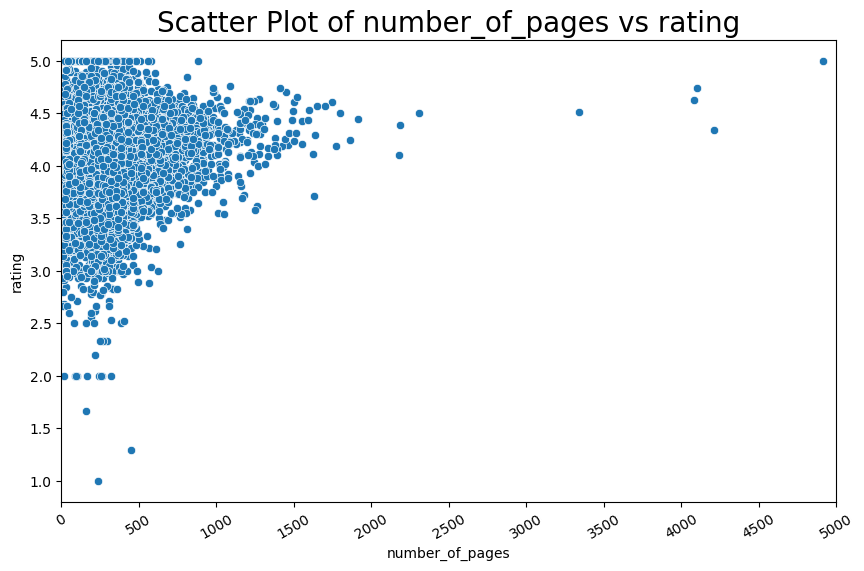

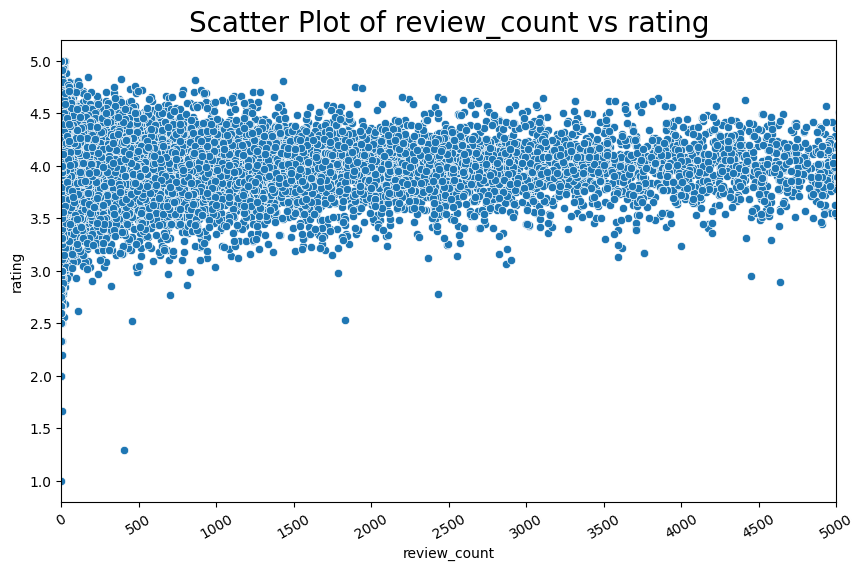

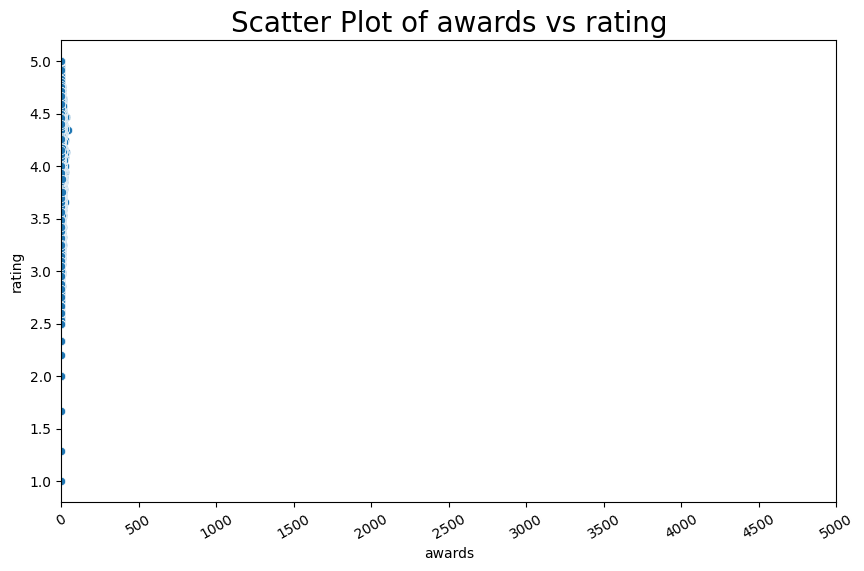

In [87]:
def plot_scatter(df, x_col, y_col, rotation=45, x_step=None, x_limit=(0, 1000)):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f"Scatter Plot of {x_col} vs {y_col}", fontsize=20)
    plt.xticks(rotation=rotation) 
    plt.xlim(x_limit)  
    if x_step is not None:
        plt.locator_params(axis="x", nbins=x_step) 

    plt.show()


plot_scatter(
    data_preprocessed,
    "number_of_pages",
    "rating",
    rotation=30,
    x_step=10,
    x_limit=(0, 5000),
)
plot_scatter(
    data_preprocessed,
    "review_count",
    "rating",
    rotation=30,
    x_step=10,
    x_limit=(0, 5000),
)
plot_scatter(
    data_preprocessed,
    "awards",
    "rating",
    rotation=30,
    x_step=10,
    x_limit=(0, 5000),
)

In [88]:
df_temp = data_preprocessed[
    [
        "series",
        "rating_count",
        "review_count",
        "number_of_pages",
        "date_published",
        "publisher",
        "genre",
        "description",
        "awards",
        "followers",
        "rating",
    ]
]
frame1 = df_temp.copy()
def follower_range(follower_count):
    if follower_count <= 10000:
        return "Group 1 (0 - 10000)"
    elif follower_count <= 50000:
        return "Group 2 (10001 - 50000)"
    elif follower_count <= 100000:
        return "Group 3 (50001 - 100000)"
    elif follower_count <= 200000:
        return "Group 4 (100001 - 200000)"
    elif follower_count <= 400000:
        return "Group 4 (200001 - 400000)"
    elif follower_count <= 600000:
        return "Group 4 (400001 - 600000)"
    else:
        return "Group 5 (600001 and above)"



frame1["follower_group"] = frame1["followers"].apply(follower_range)
frame1 = frame1[
    [
        "series",
        "rating_count",
        "review_count",
        "number_of_pages",
        "date_published",
        "publisher",
        "genre",
        "description",
        "awards",
        "follower_group",
        "rating",
    ]
]

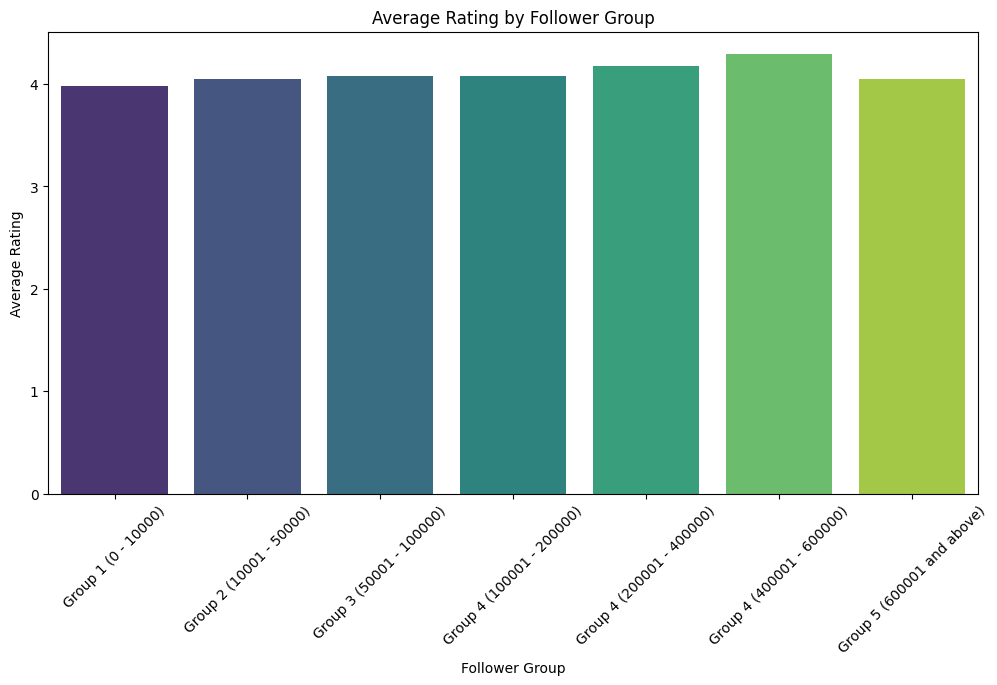

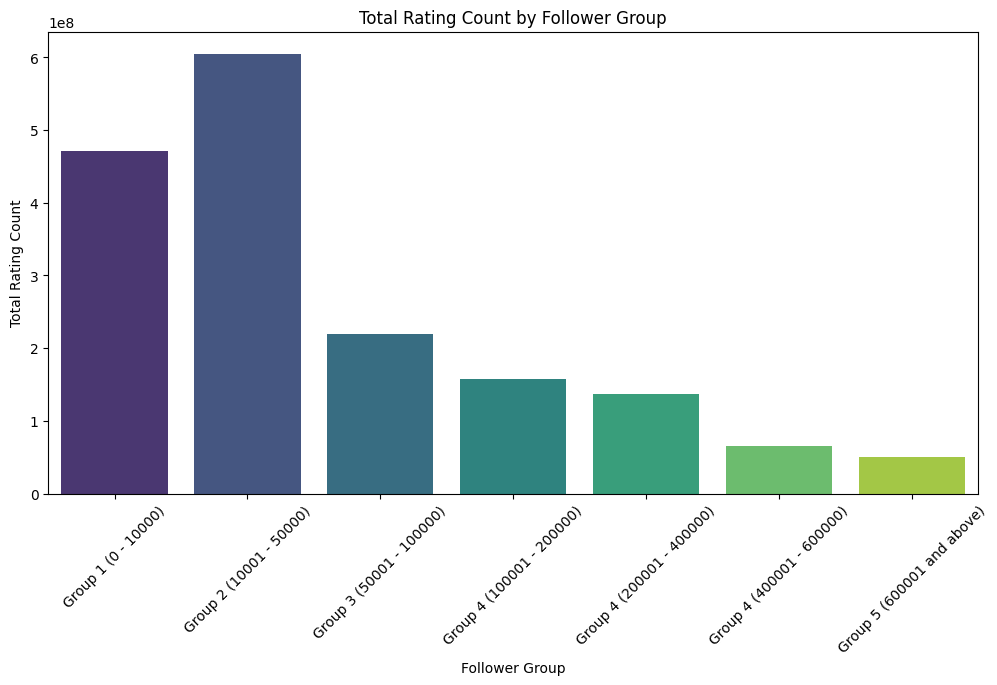

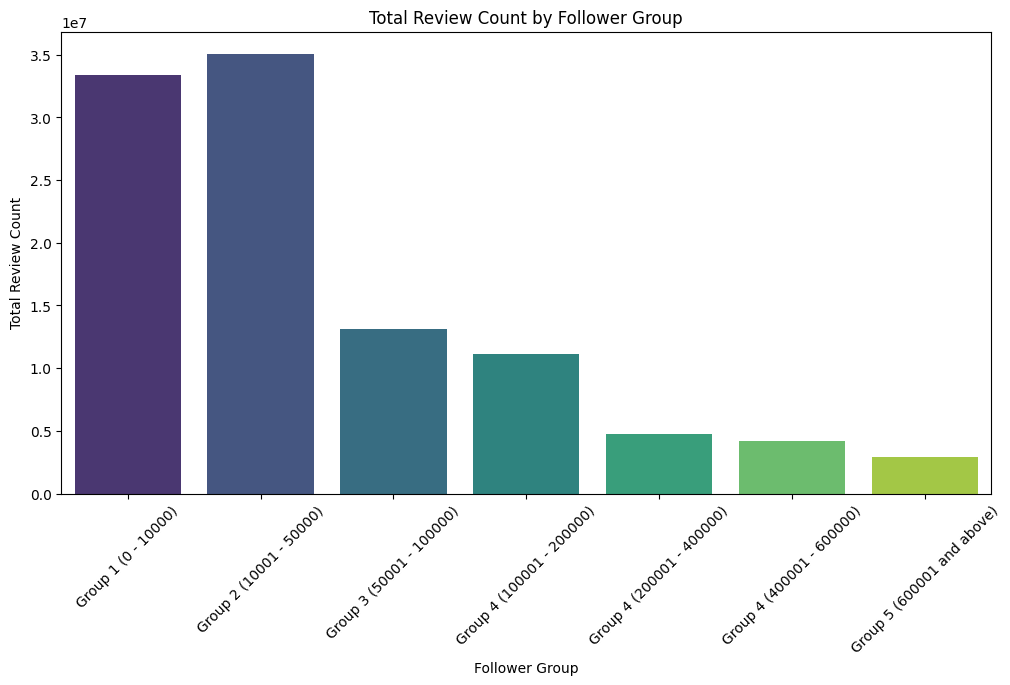

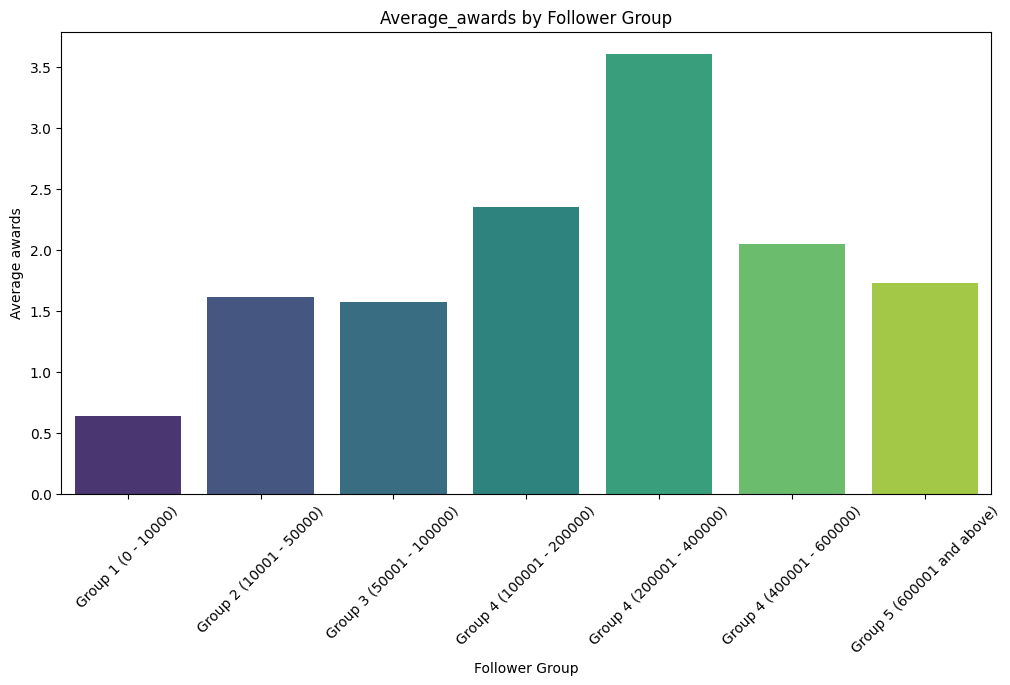

In [89]:
grouped_follower = (
    frame1.groupby("follower_group")
    .agg(
        average_rating=("rating", "mean"),
        total_rating_count=("rating_count", "sum"),
        total_review_count=("review_count", "sum"),
        average_awards=("awards", "mean"),
    )
    .reset_index()
)


def plot_bar_chart(df, x_col, y_col, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    sns.barplot(x=x_col, y=y_col, data=df, palette="viridis")
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.show()


# Vẽ biểu đồ cho average_rating theo follower_group
plot_bar_chart(
    grouped_follower,
    x_col="follower_group",
    y_col="average_rating",
    title="Average Rating by Follower Group",
    x_label="Follower Group",
    y_label="Average Rating",
)

# Vẽ biểu đồ cho tổng rating_count theo follower_group
plot_bar_chart(
    grouped_follower,
    x_col="follower_group",
    y_col="total_rating_count",
    title="Total Rating Count by Follower Group",
    x_label="Follower Group",
    y_label="Total Rating Count",
)

# Vẽ biểu đồ cho tổng review_count theo follower_group
plot_bar_chart(
    grouped_follower,
    x_col="follower_group",
    y_col="total_review_count",
    title="Total Review Count by Follower Group",
    x_label="Follower Group",
    y_label="Total Review Count",
)
plot_bar_chart(
    grouped_follower,
    x_col="follower_group",
    y_col="average_awards",
    title="Average_awards by Follower Group",
    x_label="Follower Group",
    y_label="Average awards",
)

In [90]:
X = data_preprocessed.drop(['id', 'rating'], axis=1)
y = data_preprocessed['rating'].values

### Split train and valid data

In [91]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.2,random_state=365)

### Training

In [92]:
def save_model(model,model_name):
  with open(model_name + '.pkl', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)

def load_model(model_name):
  with open(model_name + '.pkl', 'rb') as f:
    return pickle.load(f)

In [93]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [94]:
# Linear Regression
reg_LR = make_pipeline(StandardScaler(), LinearRegression())
# Support Vector Regression
reg_SVR = make_pipeline(StandardScaler(), SVR(C=0.5, gamma=0.1))
# MLP Regression
reg_MLPR = make_pipeline(StandardScaler(), MLPRegressor(random_state=1, max_iter=500))

In [95]:
reg_LR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [96]:
reg_SVR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.5, gamma=0.1))])

In [97]:
reg_MLPR.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor', MLPRegressor(max_iter=500, random_state=1))])

In [98]:
save_model(reg_LR, 'LR')
save_model(reg_SVR, 'SVR')
save_model(reg_MLPR, 'MLPR')

### Evaluating

Ở đây nhóm em sử dụng 3 độ đo : MAE , MSE , R2

In [99]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [100]:
def scoreModel(y_true, y_pre):
  """
  Parameters: y_true: , y_pre: predicted values
  Returns: MAE, MSE, R2 metric 
  """
  MAE_score = MAE(y_true, y_pre)
  MSE_score = MSE(y_true, y_pre)
  R2_score = R2(y_true, y_pre)
  print('MAE: ', MAE_score, '\n' +
      'MSE: ', MSE_score, '\n' +
      'R2: ', R2_score, '\n')
  return MAE_score, MSE_score, R2_score

#### Train set

In [101]:
def getResult(X, y):
  y_pre_LR = reg_LR.predict(X)
  y_pre_SVR = reg_SVR.predict(X)
  y_pre_MLPR = reg_MLPR.predict(X)
  LR = scoreModel(y, y_pre_LR)
  SVR = scoreModel(y, y_pre_SVR)
  MLPR = scoreModel(y, y_pre_MLPR)
  result_table = pd.DataFrame([['Linear Regression'] + list(LR),
                ['Support Vector Regression (C=0.5, gamma=0.1)'] + list(SVR),
                ['Multi-Layer Perceptron Regressor (Neural Network)'] + list(MLPR)], columns=['Model', 'MAE', 'MSE', 'R2'])
  return result_table
      

In [102]:
getResult(X_train, y_train)

MAE:  0.23300266312294365 
MSE:  0.096317565335977 
R2:  0.03223069312463844 

MAE:  0.21623225346113403 
MSE:  0.08610322937384801 
R2:  0.1348612029364279 

MAE:  0.22115295217637462 
MSE:  0.08695372495697816 
R2:  0.1263156845970126 



,Model,MAE,MSE,R2
0,Linear Regression,0.233003,0.096318,0.032231
1,"Support Vector Regression (C=0.5, gamma=0.1)",0.216232,0.086103,0.134861
2,Multi-Layer Perceptron Regressor (Neural Network),0.221153,0.086954,0.126316


#### Test set

In [103]:
getResult(X_valid, y_valid)

MAE:  0.23067798172783294 
MSE:  0.09487191880773622 
R2:  0.043124920993677485 

MAE:  0.22113733360903964 
MSE:  0.09012406840794099 
R2:  0.09101158528283493 

MAE:  0.22675513877725056 
MSE:  0.09216787907306835 
R2:  0.07039777756981713 



,Model,MAE,MSE,R2
0,Linear Regression,0.230678,0.094872,0.043125
1,"Support Vector Regression (C=0.5, gamma=0.1)",0.221137,0.090124,0.091012
2,Multi-Layer Perceptron Regressor (Neural Network),0.226755,0.092168,0.070398


**Nhận xét** : Có thể thấy trong 3 độ đo thì Support Vector Regression (C=0.5, gamma=0.1) cho ra kết quả tốt nhất. Nên mình sẽ dùng model này để chạy và in ra file dự đoán cho kết quả bài toán

In [104]:
predict = reg_MLPR.predict(X_valid)

In [105]:
frame = pd.DataFrame( {'Predict' : predict,
                       'Rating' : y_valid
                      }
                    )

In [106]:
frame.to_csv('predict.csv')